## Final Project Submission

Please fill out:
* Student name: David Cuervo
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [4]:
testdf = pd.read_csv('test_set_values.csv')

In [5]:
testdf.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
traindf = pd.read_csv('training_set_values.csv')

In [7]:
traindf.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
welldf = pd.read_csv('well_status.csv')
welldf.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [9]:
welldf['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [10]:
df = pd.merge(traindf, welldf)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [12]:
#Overview of column names and missing values
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

## Amount_TSH

[Text(0.5, 1.0, 'amount_tsh')]

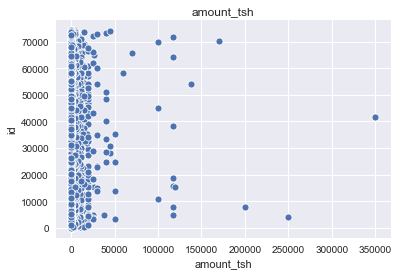

In [13]:
#Amount of water available at waterpoint (height)
sns.scatterplot(x='amount_tsh', y='id', data=df).set(title='amount_tsh')

In [14]:
df['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [15]:
#Creating bins 

tsh_labels = ['no tsh', '1+', '100+','1000+']

tsh_bins = [0,1,100,1000,df.amount_tsh.max()]

df['tsh_bins'] = pd.cut(df['amount_tsh'], bins=tsh_bins, labels=tsh_labels, 
                        include_lowest=True)

In [16]:
#Drop original column
df = df.drop('amount_tsh', axis = 1)

In [17]:
#Check new tsh_bins column
df['tsh_bins'].head()

0     1000+
1    no tsh
2        1+
3    no tsh
4    no tsh
Name: tsh_bins, dtype: category
Categories (4, object): [no tsh < 1+ < 100+ < 1000+]

In [18]:
#Create dummy variables for the new categorical column
tsh_dummies = pd.get_dummies(df.tsh_bins)
tsh_dummies.head()

tsh_bins,no tsh,1+,100+,1000+
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0


In [19]:
#Merge dummy variables and drop the categorical column
df = pd.concat([df,tsh_dummies], axis='columns')
df.head()

,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,tsh_bins,no tsh,1+,100+,1000+
0,69572,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,spring,groundwater,communal standpipe,communal standpipe,functional,1000+,0,0,0,1
1,8776,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,no tsh,1,0,0,0
2,34310,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,dam,surface,communal standpipe multiple,communal standpipe,functional,1+,0,1,0,0
3,67743,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,no tsh,1,0,0,0
4,19728,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,no tsh,1,0,0,0


In [20]:
df = df.drop('tsh_bins', axis = 1)

In [21]:
#Forgot to add prefix
df.rename(columns={"1+": "tsh_1+", "100+": "tsh_100+", "1000+": "tsh_1000+"})

,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,no tsh,tsh_1+,tsh_100+,tsh_1000+
0,69572,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0,0,0,1
1,8776,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,0,0
2,34310,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,0,1,0,0
3,67743,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,0,0,0
4,19728,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0,1,0,0
59396,27263,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,river,river/lake,surface,communal standpipe,communal standpipe,functional,0,0,0,1
59397,37057,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,machine dbh,borehole,groundwater,hand pump,hand pump,functional,1,0,0,0
59398,31282,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,0,0,0


## Date_recorded

In [22]:
#This is the date the row was entered
#I don't think it is pertinent for the models, will drop
df = df.drop('date_recorded', axis = 1)
df.head()

,id,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,no tsh,1+,100+,1000+
0,69572,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,...,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0,0,0,1
1,8776,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,0,0
2,34310,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,...,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,0,1,0,0
3,67743,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,...,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1,0,0,0
4,19728,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,0,0,0


## Funder

In [23]:
# There are about 1900 different funders
df['funder'].value_counts()

Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
                           ... 
Nginila                       1
Germany Cristians             1
Trach                         1
Csf                           1
Mzee Salum Bakari Darus       1
Name: funder, Length: 1897, dtype: int64

In [24]:
#Looking at the top 20, I'll choose to keep only the top 8 
df['funder'].value_counts().head(20)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [25]:
#Make new column with top 8 funders and the rest will be 'other'
top_funders = df.funder.value_counts().index.tolist()[:8]

df['top_funders'] = df.funder.apply(lambda x: x if x in top_funders else 'Other')

In [26]:
#Check for missing values
df['top_funders'].isna().sum()

0

In [27]:
#Drop original 'funder' column
df = df.drop(columns='funder')

In [28]:
#Make dummy variables for modeling
top_funders_dummy = pd.get_dummies(df.top_funders, prefix='top_funder', drop_first=True)
top_funders_dummy.head()

,top_funder_Government Of Tanzania,top_funder_Hesawa,top_funder_Kkkt,top_funder_Other,top_funder_Rwssp,top_funder_Unicef,top_funder_World Bank,top_funder_World Vision
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0


In [29]:
df = pd.concat([df, top_funders_dummy], axis=1)
df.head()

,id,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,...,1000+,top_funders,top_funder_Government Of Tanzania,top_funder_Hesawa,top_funder_Kkkt,top_funder_Other,top_funder_Rwssp,top_funder_Unicef,top_funder_World Bank,top_funder_World Vision
0,69572,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,...,1,Other,0,0,0,1,0,0,0,0
1,8776,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,...,0,Other,0,0,0,1,0,0,0,0
2,34310,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,...,0,Other,0,0,0,1,0,0,0,0
3,67743,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,0,Unicef,0,0,0,0,0,1,0,0
4,19728,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,...,0,Other,0,0,0,1,0,0,0,0


In [30]:
df = df.drop(columns='top_funders', axis=1)
df.head()

,id,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,...,100+,1000+,top_funder_Government Of Tanzania,top_funder_Hesawa,top_funder_Kkkt,top_funder_Other,top_funder_Rwssp,top_funder_Unicef,top_funder_World Bank,top_funder_World Vision
0,69572,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,...,0,1,0,0,0,1,0,0,0,0
1,8776,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,...,0,0,0,0,0,1,0,0,0,0
2,34310,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,...,0,0,0,0,0,1,0,0,0,0
3,67743,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,0,0,0,0,0,0,0,1,0,0
4,19728,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,...,0,0,0,0,0,1,0,0,0,0


## GPS_height

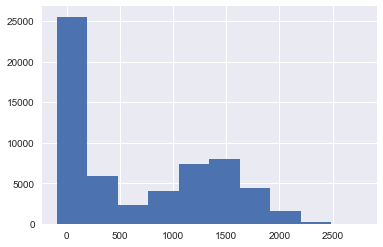

In [31]:
#Altitude of the well
df['gps_height'].hist()

In [32]:
#Will use column as is

## Installer

In [33]:
#Organizations that installed the wells
df['installer'].value_counts().head(20)

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
LGA                     408
World vision            408
WEDECO                  397
TASAF                   396
District council        392
Name: installer, dtype: int64

In [34]:
#Will use the top 5 installers (over 1000)
top_installers = df.installer.value_counts().index.tolist()[:5]

df['top_installers'] = df.installer.apply(lambda x: x if x in top_installers else 'Other')

In [35]:
df['top_installers'].value_counts()

Other         36857
DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
Name: top_installers, dtype: int64

In [36]:
#Drop original column
df = df.drop(columns='installer', axis=1)
df.head()

,id,gps_height,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,...,1000+,top_funder_Government Of Tanzania,top_funder_Hesawa,top_funder_Kkkt,top_funder_Other,top_funder_Rwssp,top_funder_Unicef,top_funder_World Bank,top_funder_World Vision,top_installers
0,69572,1390,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,...,1,0,0,0,1,0,0,0,0,Other
1,8776,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,...,0,0,0,0,1,0,0,0,0,Other
2,34310,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,...,0,0,0,0,1,0,0,0,0,Other
3,67743,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,...,0,0,0,0,0,0,1,0,0,Other
4,19728,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,...,0,0,0,0,1,0,0,0,0,Other


In [37]:
#Make dummy variables for modeling
top_installers_dummy = pd.get_dummies(df.top_installers, prefix='top_installer', drop_first=True)
top_installers_dummy.head()

,top_installer_DANIDA,top_installer_DWE,top_installer_Government,top_installer_Other,top_installer_RWE
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [38]:
#Merge dummy columns to df
df = pd.concat([df, top_installers_dummy], axis =1)

In [39]:
#Drop categorical installer column
df = df.drop(columns='top_installers', axis=1)
df.head()

,id,gps_height,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,...,top_funder_Other,top_funder_Rwssp,top_funder_Unicef,top_funder_World Bank,top_funder_World Vision,top_installer_DANIDA,top_installer_DWE,top_installer_Government,top_installer_Other,top_installer_RWE
0,69572,1390,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,...,1,0,0,0,0,0,0,0,1,0
1,8776,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,...,1,0,0,0,0,0,0,0,1,0
2,34310,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,...,1,0,0,0,0,0,0,0,1,0
3,67743,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,...,0,0,1,0,0,0,0,0,1,0
4,19728,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,...,1,0,0,0,0,0,0,0,1,0


## Longitude and Latitude

In [40]:
df['longitude'].value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [42]:
#Replace zeros with nan as placeholder
df['longitude'].replace(0, np.nan, inplace=True)

In [43]:
df['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [44]:
#Replace the -2.000000e-08 latitudes with nan
df['latitude'].replace(-2e-08, np.nan, inplace=True)

In [45]:
df['latitude'].value_counts()

-2.496459    2
-6.964258    2
-6.981884    2
-7.175174    2
-7.104625    2
            ..
-5.726001    1
-9.646831    1
-8.124530    1
-2.535985    1
-2.598965    1
Name: latitude, Length: 57516, dtype: int64

## WPT_name

In [46]:
#This is the name of the water point
#It doesn't make sense for the name to influence the well's status, will drop
df = df.drop(columns='wpt_name', axis=1)

## Num_private

In [47]:
df['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [48]:
#It is almost entirely zeros, plus there is no description for the column
df = df.drop(columns='num_private', axis=1)

## Basin

In [49]:
#Geographic water basin
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [50]:
#Will leave as is, will make dummy variables for analysis 
basin_dummy = pd.get_dummies(df.basin, prefix='basin', drop_first=True)
basin_dummy.head()

,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu
0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0


In [51]:
df = pd.concat([df, basin_dummy], axis=1)

In [52]:
df = df.drop(columns='basin', axis=1)
df.head()

,id,gps_height,longitude,latitude,subvillage,region,region_code,district_code,lga,ward,...,top_installer_Other,top_installer_RWE,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu
0,69572,1390,34.938093,-9.856322,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,...,1,0,1,0,0,0,0,0,0,0
1,8776,1399,34.698766,-2.147466,Nyamara,Mara,20,2,Serengeti,Natta,...,1,0,0,0,0,1,0,0,0,0
2,34310,686,37.460664,-3.821329,Majengo,Manyara,21,4,Simanjiro,Ngorika,...,1,0,0,0,0,0,1,0,0,0
3,67743,263,38.486161,-11.155298,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,...,1,0,0,0,0,0,0,0,1,0
4,19728,0,31.130847,-1.825359,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,...,1,0,0,0,0,1,0,0,0,0


## Subvillage

In [53]:
df['subvillage'].value_counts().head(20)

Madukani      508
Shuleni       506
Majengo       502
Kati          373
Mtakuja       262
Sokoni        232
M             187
Muungano      172
Mbuyuni       164
Mlimani       152
Songambele    147
Miembeni      134
Msikitini     134
1             132
Kibaoni       114
Kanisani      111
Mapinduzi     109
I             109
Mjimwema      108
Mjini         108
Name: subvillage, dtype: int64

In [54]:
#Will keep the top 6 and make the rest "Other"
top_subvillages = df.subvillage.value_counts().index.tolist()[:6]

df['top_subvillages'] = df.subvillage.apply(lambda x: x if x in top_subvillages else 'Other')

In [55]:
#Drop original column
df = df.drop(columns='subvillage', axis=1)
df.head()

,id,gps_height,longitude,latitude,region,region_code,district_code,lga,ward,population,...,top_installer_RWE,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,top_subvillages
0,69572,1390,34.938093,-9.856322,Iringa,11,5,Ludewa,Mundindi,109,...,0,1,0,0,0,0,0,0,0,Other
1,8776,1399,34.698766,-2.147466,Mara,20,2,Serengeti,Natta,280,...,0,0,0,0,1,0,0,0,0,Other
2,34310,686,37.460664,-3.821329,Manyara,21,4,Simanjiro,Ngorika,250,...,0,0,0,0,0,1,0,0,0,Majengo
3,67743,263,38.486161,-11.155298,Mtwara,90,63,Nanyumbu,Nanyumbu,58,...,0,0,0,0,0,0,0,1,0,Other
4,19728,0,31.130847,-1.825359,Kagera,18,1,Karagwe,Nyakasimbi,0,...,0,0,0,0,1,0,0,0,0,Other


In [56]:
#Create dummy varibles
top_subvillages_dummy = pd.get_dummies(df.top_subvillages, prefix='top_subvillage', drop_first=True)
top_subvillages_dummy.head()

,top_subvillage_Madukani,top_subvillage_Majengo,top_subvillage_Mtakuja,top_subvillage_Other,top_subvillage_Shuleni,top_subvillage_Sokoni
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [57]:
df = pd.concat([df, top_subvillages_dummy], axis =1)

In [58]:
df = df.drop(columns='top_subvillages', axis=1)
df.head()

,id,gps_height,longitude,latitude,region,region_code,district_code,lga,ward,population,...,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,top_subvillage_Madukani,top_subvillage_Majengo,top_subvillage_Mtakuja,top_subvillage_Other,top_subvillage_Shuleni,top_subvillage_Sokoni
0,69572,1390,34.938093,-9.856322,Iringa,11,5,Ludewa,Mundindi,109,...,0,0,0,0,0,0,0,1,0,0
1,8776,1399,34.698766,-2.147466,Mara,20,2,Serengeti,Natta,280,...,0,0,0,0,0,0,0,1,0,0
2,34310,686,37.460664,-3.821329,Manyara,21,4,Simanjiro,Ngorika,250,...,1,0,0,0,0,1,0,0,0,0
3,67743,263,38.486161,-11.155298,Mtwara,90,63,Nanyumbu,Nanyumbu,58,...,0,0,1,0,0,0,0,1,0,0
4,19728,0,31.130847,-1.825359,Kagera,18,1,Karagwe,Nyakasimbi,0,...,0,0,0,0,0,0,0,1,0,0


## Region

In [59]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [60]:
#Will use as is, make dummy variables 
region_dummy = pd.get_dummies(df.region, prefix='region', drop_first=True)
region_dummy.head()

,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
#Merge df and region_dummy
df = pd.concat([df, region_dummy], axis =1)

In [62]:
df = df.drop(columns='region', axis=1)
df.head()

,id,gps_height,longitude,latitude,region_code,district_code,lga,ward,population,public_meeting,...,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga
0,69572,1390,34.938093,-9.856322,11,5,Ludewa,Mundindi,109,True,...,0,0,0,0,0,0,0,0,0,0
1,8776,1399,34.698766,-2.147466,20,2,Serengeti,Natta,280,NaN,...,0,0,0,0,0,0,0,0,0,0
2,34310,686,37.460664,-3.821329,21,4,Simanjiro,Ngorika,250,True,...,0,0,0,0,0,0,0,0,0,0
3,67743,263,38.486161,-11.155298,90,63,Nanyumbu,Nanyumbu,58,True,...,0,1,0,0,0,0,0,0,0,0
4,19728,0,31.130847,-1.825359,18,1,Karagwe,Nyakasimbi,0,True,...,0,0,0,0,0,0,0,0,0,0


## Region_code

In [63]:
#Region coded, unnecessary since we already have the regions
df = df.drop(columns='region_code', axis=1)

## District_code

In [64]:
#Unsure which of the columns is the 'district'
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [65]:
#20 different district codes
df['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [66]:
#Not lga, will try ward
df['ward'].value_counts()

Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Kapilula       1
Thawi          1
Mlimani        1
Rasbura        1
Nyamtinga      1
Name: ward, Length: 2092, dtype: int64

In [67]:
#Column district_code does not represent any of the other geographic columns
#It is therefore unlabed and will be difficult to interpret 
df = df.drop(columns='district_code', axis=1)

## LGA

In [68]:
#Local government area
#Will keep the top 5
top_lga = df.lga.value_counts().index.tolist()[:5]

df['top_lga'] = df.lga.apply(lambda x: x if x in top_lga else 'Other')

In [69]:
df = df.drop(columns='lga', axis=1)
df.head()

,id,gps_height,longitude,latitude,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,...,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,top_lga
0,69572,1390,34.938093,-9.856322,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,...,0,0,0,0,0,0,0,0,0,Other
1,8776,1399,34.698766,-2.147466,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,...,0,0,0,0,0,0,0,0,0,Other
2,34310,686,37.460664,-3.821329,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,...,0,0,0,0,0,0,0,0,0,Other
3,67743,263,38.486161,-11.155298,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,...,1,0,0,0,0,0,0,0,0,Other
4,19728,0,31.130847,-1.825359,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,...,0,0,0,0,0,0,0,0,0,Other


In [70]:
top_lga_dummy = pd.get_dummies(df.top_lga, prefix='top_lga', drop_first=True)
top_lga_dummy.head()

,top_lga_Bariadi,top_lga_Moshi Rural,top_lga_Njombe,top_lga_Other,top_lga_Rungwe
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [71]:
df = pd.concat([df, top_lga_dummy], axis =1)

In [72]:
df = df.drop(columns='top_lga', axis=1)
df.head()

,id,gps_height,longitude,latitude,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,...,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,top_lga_Bariadi,top_lga_Moshi Rural,top_lga_Njombe,top_lga_Other,top_lga_Rungwe
0,69572,1390,34.938093,-9.856322,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,...,0,0,0,0,0,0,0,0,1,0
1,8776,1399,34.698766,-2.147466,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,...,0,0,0,0,0,0,0,0,1,0
2,34310,686,37.460664,-3.821329,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,...,0,0,0,0,0,0,0,0,1,0
3,67743,263,38.486161,-11.155298,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,...,0,0,0,0,0,0,0,0,1,0
4,19728,0,31.130847,-1.825359,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


## Ward

In [73]:
df['ward'].value_counts().head(20)

Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
Kitunda          203
Mishamo          203
Msindo           201
Chalinze         196
Maji ya Chai     190
Usuka            187
Ngarenanyuki     172
Chanika          171
Vikindu          162
Mtwango          153
Matola           145
Zinga/Ikerege    141
Maramba          139
Wanging'ombe     139
Itete            137
Name: ward, dtype: int64

In [74]:
#Will keep the top 8
top_wards = df.ward.value_counts().index.tolist()[:8]

df['top_wards'] = df.ward.apply(lambda x: x if x in top_wards else 'Other')

In [75]:
df = df.drop(columns='ward', axis=1)
df.head()

,id,gps_height,longitude,latitude,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,...,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,top_lga_Bariadi,top_lga_Moshi Rural,top_lga_Njombe,top_lga_Other,top_lga_Rungwe,top_wards
0,69572,1390,34.938093,-9.856322,109,True,GeoData Consultants Ltd,VWC,Roman,False,...,0,0,0,0,0,0,0,1,0,Other
1,8776,1399,34.698766,-2.147466,280,NaN,GeoData Consultants Ltd,Other,NaN,True,...,0,0,0,0,0,0,0,1,0,Other
2,34310,686,37.460664,-3.821329,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,...,0,0,0,0,0,0,0,1,0,Other
3,67743,263,38.486161,-11.155298,58,True,GeoData Consultants Ltd,VWC,NaN,True,...,0,0,0,0,0,0,0,1,0,Other
4,19728,0,31.130847,-1.825359,0,True,GeoData Consultants Ltd,NaN,NaN,True,...,0,0,0,0,0,0,0,1,0,Other


In [76]:
#Make dummy ward
top_wards_dummy = pd.get_dummies(df.top_wards, prefix='top_wards', drop_first=True)
top_wards_dummy.head()

,top_wards_Imalinyi,top_wards_Kitunda,top_wards_Mdandu,top_wards_Mishamo,top_wards_Msindo,top_wards_Nduruma,top_wards_Other,top_wards_Siha Kati
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [77]:
df = pd.concat([df, top_wards_dummy], axis=1)

In [78]:
df = df.drop(columns='top_wards', axis=1)
df.head()

,id,gps_height,longitude,latitude,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,...,top_lga_Other,top_lga_Rungwe,top_wards_Imalinyi,top_wards_Kitunda,top_wards_Mdandu,top_wards_Mishamo,top_wards_Msindo,top_wards_Nduruma,top_wards_Other,top_wards_Siha Kati
0,69572,1390,34.938093,-9.856322,109,True,GeoData Consultants Ltd,VWC,Roman,False,...,1,0,0,0,0,0,0,0,1,0
1,8776,1399,34.698766,-2.147466,280,NaN,GeoData Consultants Ltd,Other,NaN,True,...,1,0,0,0,0,0,0,0,1,0
2,34310,686,37.460664,-3.821329,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,...,1,0,0,0,0,0,0,0,1,0
3,67743,263,38.486161,-11.155298,58,True,GeoData Consultants Ltd,VWC,NaN,True,...,1,0,0,0,0,0,0,0,1,0
4,19728,0,31.130847,-1.825359,0,True,GeoData Consultants Ltd,NaN,NaN,True,...,1,0,0,0,0,0,0,0,1,0


## Population

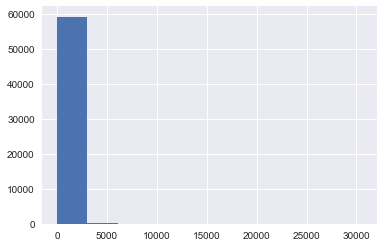

In [79]:
df['population'].hist()

[Text(0.5, 1.0, 'population')]

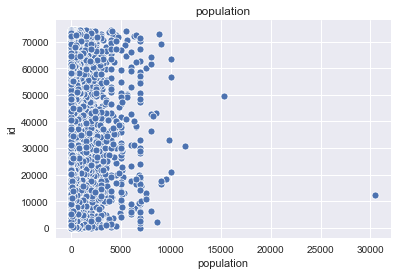

In [80]:
sns.scatterplot(x='population', y='id', data=df).set(title='population')

In [81]:
df['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [82]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [83]:
#There are a lot of zeros so i'll bin the column
population_labels = ['no people', 'under 1000', '1000+']

population_bins = [0, 1, 1000, df.population.max()]

df['population_bins'] = pd.cut(df['population'],
                                        bins=population_bins,
                                        labels=population_labels,
                                        include_lowest=True)

In [84]:
df = df.drop('population', axis = 1)

In [85]:
df['population_bins'].head()

0    under 1000
1    under 1000
2    under 1000
3    under 1000
4     no people
Name: population_bins, dtype: category
Categories (3, object): [no people < under 1000 < 1000+]

In [86]:
pop_dummy = pd.get_dummies(df.population_bins, prefix='population', drop_first=True)
pop_dummy.head()

,population_under 1000,population_1000+
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [87]:
df = pd.concat([df, pop_dummy], axis=1)

In [88]:
df = df.drop(columns='population_bins', axis=1)
df.head()

,id,gps_height,longitude,latitude,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,...,top_wards_Imalinyi,top_wards_Kitunda,top_wards_Mdandu,top_wards_Mishamo,top_wards_Msindo,top_wards_Nduruma,top_wards_Other,top_wards_Siha Kati,population_under 1000,population_1000+
0,69572,1390,34.938093,-9.856322,True,GeoData Consultants Ltd,VWC,Roman,False,1999,...,0,0,0,0,0,0,1,0,1,0
1,8776,1399,34.698766,-2.147466,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,...,0,0,0,0,0,0,1,0,1,0
2,34310,686,37.460664,-3.821329,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,...,0,0,0,0,0,0,1,0,1,0
3,67743,263,38.486161,-11.155298,True,GeoData Consultants Ltd,VWC,NaN,True,1986,...,0,0,0,0,0,0,1,0,1,0
4,19728,0,31.130847,-1.825359,True,GeoData Consultants Ltd,NaN,NaN,True,0,...,0,0,0,0,0,0,1,0,0,0


## Public_meeting

In [89]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [90]:
#Will drop because there is no description of the column and it doesn't seem 
#pertinent to the models
df = df.drop(columns='public_meeting', axis=1)

## Recorded_by

In [91]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [92]:
#Every entry was recorded by the same group so there is zero variance 
df = df.drop(columns='recorded_by', axis=1)

## Scheme_management

In [93]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [94]:
#I'll keep the top 8
top_scheme_management = df.scheme_management.value_counts().index.tolist()[:8]

df['top_scheme_management'] = df.scheme_management.apply(lambda x: x if x in top_scheme_management else 'Other')

In [95]:
df = df.drop(columns='scheme_management', axis=1)
df.head()

,id,gps_height,longitude,latitude,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,...,top_wards_Kitunda,top_wards_Mdandu,top_wards_Mishamo,top_wards_Msindo,top_wards_Nduruma,top_wards_Other,top_wards_Siha Kati,population_under 1000,population_1000+,top_scheme_management
0,69572,1390,34.938093,-9.856322,Roman,False,1999,gravity,gravity,gravity,...,0,0,0,0,0,1,0,1,0,VWC
1,8776,1399,34.698766,-2.147466,NaN,True,2010,gravity,gravity,gravity,...,0,0,0,0,0,1,0,1,0,Other
2,34310,686,37.460664,-3.821329,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,...,0,0,0,0,0,1,0,1,0,VWC
3,67743,263,38.486161,-11.155298,NaN,True,1986,submersible,submersible,submersible,...,0,0,0,0,0,1,0,1,0,VWC
4,19728,0,31.130847,-1.825359,NaN,True,0,gravity,gravity,gravity,...,0,0,0,0,0,1,0,0,0,Other


In [97]:
top_scheme_management_dummy = pd.get_dummies(df.top_scheme_management, prefix='top_scheme_management', drop_first=True)
top_scheme_management_dummy.head()

,top_scheme_management_Other,top_scheme_management_Parastatal,top_scheme_management_Private operator,top_scheme_management_VWC,top_scheme_management_WUA,top_scheme_management_WUG,top_scheme_management_Water Board,top_scheme_management_Water authority
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0


In [98]:
df = pd.concat([df, top_scheme_management_dummy], axis=1)

In [99]:
df = df.drop(columns='top_scheme_management', axis=1)
df.head()

,id,gps_height,longitude,latitude,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,...,population_under 1000,population_1000+,top_scheme_management_Other,top_scheme_management_Parastatal,top_scheme_management_Private operator,top_scheme_management_VWC,top_scheme_management_WUA,top_scheme_management_WUG,top_scheme_management_Water Board,top_scheme_management_Water authority
0,69572,1390,34.938093,-9.856322,Roman,False,1999,gravity,gravity,gravity,...,1,0,0,0,0,1,0,0,0,0
1,8776,1399,34.698766,-2.147466,NaN,True,2010,gravity,gravity,gravity,...,1,0,1,0,0,0,0,0,0,0
2,34310,686,37.460664,-3.821329,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,...,1,0,0,0,0,1,0,0,0,0
3,67743,263,38.486161,-11.155298,NaN,True,1986,submersible,submersible,submersible,...,1,0,0,0,0,1,0,0,0,0
4,19728,0,31.130847,-1.825359,NaN,True,0,gravity,gravity,gravity,...,0,0,1,0,0,0,0,0,0,0


## Scheme_name

In [100]:
df['scheme_name'].value_counts()

K                           682
None                        644
Borehole                    546
Chalinze wate               405
M                           400
                           ... 
QWIQWI                        1
Jimmy                         1
Uwekule                       1
TM part one water supply      1
Fufu                          1
Name: scheme_name, Length: 2696, dtype: int64

In [101]:
#Dropping scheme_name, too many missing values
df = df.drop('scheme_name', axis = 1)

## Permit

In [102]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [103]:
#Will make column into a binary variable for analysis
df['permit'] = df['permit'].astype(float)
df['permit']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
59395    1.0
59396    1.0
59397    0.0
59398    1.0
59399    1.0
Name: permit, Length: 59400, dtype: float64

## Construction_year

In [104]:
df['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [105]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [106]:
# Will change zeros to nan as a placeholder 
df['construction_year'].replace(0, np.nan, inplace=True)

## Extraction Type / Group / Class

In [107]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [108]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [109]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [110]:
#I'll go with extraction_type_group since it is condensed yet has more variability than class
extrac_group_dummy = pd.get_dummies(df.extraction_type_group, prefix='extraction_type', drop_first=True)
extrac_group_dummy.head()

,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other handpump,extraction_type_other motorpump,extraction_type_rope pump,extraction_type_submersible,extraction_type_swn 80,extraction_type_wind-powered
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [111]:
df = pd.concat([df, extrac_group_dummy], axis=1)

In [112]:
df = df.drop(columns=['extraction_type', 'extraction_type_group', 'extraction_type_class'], axis=1)
df.head()

,id,gps_height,longitude,latitude,permit,construction_year,management,management_group,payment,payment_type,...,extraction_type_india mark iii,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other handpump,extraction_type_other motorpump,extraction_type_rope pump,extraction_type_submersible,extraction_type_swn 80,extraction_type_wind-powered
0,69572,1390,34.938093,-9.856322,0.0,1999.0,vwc,user-group,pay annually,annually,...,0,0,0,0,0,0,0,0,0,0
1,8776,1399,34.698766,-2.147466,1.0,2010.0,wug,user-group,never pay,never pay,...,0,0,0,0,0,0,0,0,0,0
2,34310,686,37.460664,-3.821329,1.0,2009.0,vwc,user-group,pay per bucket,per bucket,...,0,0,0,0,0,0,0,0,0,0
3,67743,263,38.486161,-11.155298,1.0,1986.0,vwc,user-group,never pay,never pay,...,0,0,0,0,0,0,0,1,0,0
4,19728,0,31.130847,-1.825359,1.0,NaN,other,other,never pay,never pay,...,0,0,0,0,0,0,0,0,0,0


## Management / Management_Group

In [113]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [114]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [115]:
#I'll drop both because the wells' managements are represented in the scheme_management column
df = df.drop(columns=['management', 'management_group'], axis=1)

## Payment / Payment Type

In [116]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [117]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [118]:
#They are the same so I'll keep one, payment_type
payment_dummy = pd.get_dummies(df.payment_type, prefix='payment', drop_first=True)
payment_dummy.head()

,payment_monthly,payment_never pay,payment_on failure,payment_other,payment_per bucket,payment_unknown
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [119]:
df = pd.concat([df, payment_dummy], axis=1)

In [120]:
df = df.drop(columns=['payment','payment_type'], axis=1)
df.head()

,id,gps_height,longitude,latitude,permit,construction_year,water_quality,quality_group,quantity,quantity_group,...,extraction_type_rope pump,extraction_type_submersible,extraction_type_swn 80,extraction_type_wind-powered,payment_monthly,payment_never pay,payment_on failure,payment_other,payment_per bucket,payment_unknown
0,69572,1390,34.938093,-9.856322,0.0,1999.0,soft,good,enough,enough,...,0,0,0,0,0,0,0,0,0,0
1,8776,1399,34.698766,-2.147466,1.0,2010.0,soft,good,insufficient,insufficient,...,0,0,0,0,0,1,0,0,0,0
2,34310,686,37.460664,-3.821329,1.0,2009.0,soft,good,enough,enough,...,0,0,0,0,0,0,0,0,1,0
3,67743,263,38.486161,-11.155298,1.0,1986.0,soft,good,dry,dry,...,0,1,0,0,0,1,0,0,0,0
4,19728,0,31.130847,-1.825359,1.0,NaN,soft,good,seasonal,seasonal,...,0,0,0,0,0,1,0,0,0,0


## Water_quality / quality_group

In [121]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [122]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [123]:
#I'll use quality_group
quality_dummy = pd.get_dummies(df.quality_group, prefix='quality', drop_first=True)
quality_dummy.head()

,quality_fluoride,quality_good,quality_milky,quality_salty,quality_unknown
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [124]:
df = pd.concat([df, quality_dummy], axis=1)

In [125]:
df = df.drop(columns=['water_quality','quality_group'], axis=1)
df.head()

,id,gps_height,longitude,latitude,permit,construction_year,quantity,quantity_group,source,source_type,...,payment_never pay,payment_on failure,payment_other,payment_per bucket,payment_unknown,quality_fluoride,quality_good,quality_milky,quality_salty,quality_unknown
0,69572,1390,34.938093,-9.856322,0.0,1999.0,enough,enough,spring,spring,...,0,0,0,0,0,0,1,0,0,0
1,8776,1399,34.698766,-2.147466,1.0,2010.0,insufficient,insufficient,rainwater harvesting,rainwater harvesting,...,1,0,0,0,0,0,1,0,0,0
2,34310,686,37.460664,-3.821329,1.0,2009.0,enough,enough,dam,dam,...,0,0,0,1,0,0,1,0,0,0
3,67743,263,38.486161,-11.155298,1.0,1986.0,dry,dry,machine dbh,borehole,...,1,0,0,0,0,0,1,0,0,0
4,19728,0,31.130847,-1.825359,1.0,NaN,seasonal,seasonal,rainwater harvesting,rainwater harvesting,...,1,0,0,0,0,0,1,0,0,0


## Quantity / Quantity_group

In [126]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [127]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [128]:
#They are identical so i'll just keep quantity
quantity_dummy = pd.get_dummies(df.quantity_group, prefix='quantity', drop_first=True)
quantity_dummy.head()

,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


In [129]:
df = pd.concat([df, quantity_dummy], axis=1)

In [130]:
df = df.drop(columns=['quantity', 'quantity_group'], axis=1)
df.head()

,id,gps_height,longitude,latitude,permit,construction_year,source,source_type,source_class,waterpoint_type,...,payment_unknown,quality_fluoride,quality_good,quality_milky,quality_salty,quality_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,69572,1390,34.938093,-9.856322,0.0,1999.0,spring,spring,groundwater,communal standpipe,...,0,0,1,0,0,0,1,0,0,0
1,8776,1399,34.698766,-2.147466,1.0,2010.0,rainwater harvesting,rainwater harvesting,surface,communal standpipe,...,0,0,1,0,0,0,0,1,0,0
2,34310,686,37.460664,-3.821329,1.0,2009.0,dam,dam,surface,communal standpipe multiple,...,0,0,1,0,0,0,1,0,0,0
3,67743,263,38.486161,-11.155298,1.0,1986.0,machine dbh,borehole,groundwater,communal standpipe multiple,...,0,0,1,0,0,0,0,0,0,0
4,19728,0,31.130847,-1.825359,1.0,NaN,rainwater harvesting,rainwater harvesting,surface,communal standpipe,...,0,0,1,0,0,0,0,0,1,0


## Source / source_type / source_class

In [131]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [132]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [133]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [134]:
#Keeping source_type
source_dummy = pd.get_dummies(df.source_type, prefix='source', drop_first=True)
source_dummy.head()

,source_dam,source_other,source_rainwater harvesting,source_river/lake,source_shallow well,source_spring
0,0,0,0,0,0,1
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,0


In [135]:
df = pd.concat([df, source_dummy], axis=1)

In [136]:
df = df.drop(columns=['source', 'source_type', 'source_class'], axis=1)
df.head()

,id,gps_height,longitude,latitude,permit,construction_year,waterpoint_type,waterpoint_type_group,status_group,no tsh,...,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_other,source_rainwater harvesting,source_river/lake,source_shallow well,source_spring
0,69572,1390,34.938093,-9.856322,0.0,1999.0,communal standpipe,communal standpipe,functional,0,...,1,0,0,0,0,0,0,0,0,1
1,8776,1399,34.698766,-2.147466,1.0,2010.0,communal standpipe,communal standpipe,functional,1,...,0,1,0,0,0,0,1,0,0,0
2,34310,686,37.460664,-3.821329,1.0,2009.0,communal standpipe multiple,communal standpipe,functional,0,...,1,0,0,0,1,0,0,0,0,0
3,67743,263,38.486161,-11.155298,1.0,1986.0,communal standpipe multiple,communal standpipe,non functional,1,...,0,0,0,0,0,0,0,0,0,0
4,19728,0,31.130847,-1.825359,1.0,NaN,communal standpipe,communal standpipe,functional,1,...,0,0,1,0,0,0,1,0,0,0


## Waterpoint_type / waterpoint_type_group

In [137]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [138]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [139]:
#Keeping waterpoint_type_group since the communal standpipe value is consolidated
waterpoint_dummy = pd.get_dummies(df.waterpoint_type_group, prefix='waterpoint_type', drop_first=True)
waterpoint_dummy.head()

,waterpoint_type_communal standpipe,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [140]:
df = pd.concat([df, waterpoint_dummy], axis=1)

In [141]:
df = df.drop(columns=['waterpoint_type', 'waterpoint_type_group'], axis=1)
df.head()

,id,gps_height,longitude,latitude,permit,construction_year,status_group,no tsh,1+,100+,...,source_other,source_rainwater harvesting,source_river/lake,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,69572,1390,34.938093,-9.856322,0.0,1999.0,functional,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,8776,1399,34.698766,-2.147466,1.0,2010.0,functional,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,34310,686,37.460664,-3.821329,1.0,2009.0,functional,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,67743,263,38.486161,-11.155298,1.0,1986.0,non functional,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,19728,0,31.130847,-1.825359,1.0,NaN,functional,1,0,0,...,0,1,0,0,0,1,0,0,0,0


# Save to CSV

In [142]:
df.to_csv(r'/Users/davidcuervo/Documents/Flatiron/Mod_3_Project/cleaned_well_data.csv')